# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Credit Analysis With DecisionTreeClassifier🏦</p>

<img src="">


<p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Table Of Contents</p>   
    
* [1. Importing Modules](#1)
    
* [2. Loading Data](#2)
    
* [3. Data PreProcessing And Visualizations](#3)

* [4. Data Balancing](#4)   
      
* [5. Modelling And Optimizing The Models](#5)
    
* [6. Results And Conclusion](#6)
 


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Importing Modules</p>

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
#from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore') 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<a id = "2"></a>
# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Loading Data</p>

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking For Categorical Columns</p>

In [8]:
# number of categorical unique values:
df.select_dtypes(include='object').nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [9]:
# values of categorical unique values:
for col in df.columns:
    if df[col].dtype=='object':
        print(f'{col}   :-------> {df[col].unique()}')

job   :-------> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital   :-------> ['married' 'single' 'divorced' 'unknown']
education   :-------> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default   :-------> ['no' 'unknown' 'yes']
housing   :-------> ['no' 'yes' 'unknown']
loan   :-------> ['no' 'yes' 'unknown']
contact   :-------> ['telephone' 'cellular']
month   :-------> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week   :-------> ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome   :-------> ['nonexistent' 'failure' 'success']
y   :-------> ['no' 'yes']


<a id= "3"></a>
# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Data PreProcessing And Visualizations</p>




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Plots For Categorical Variables</p>

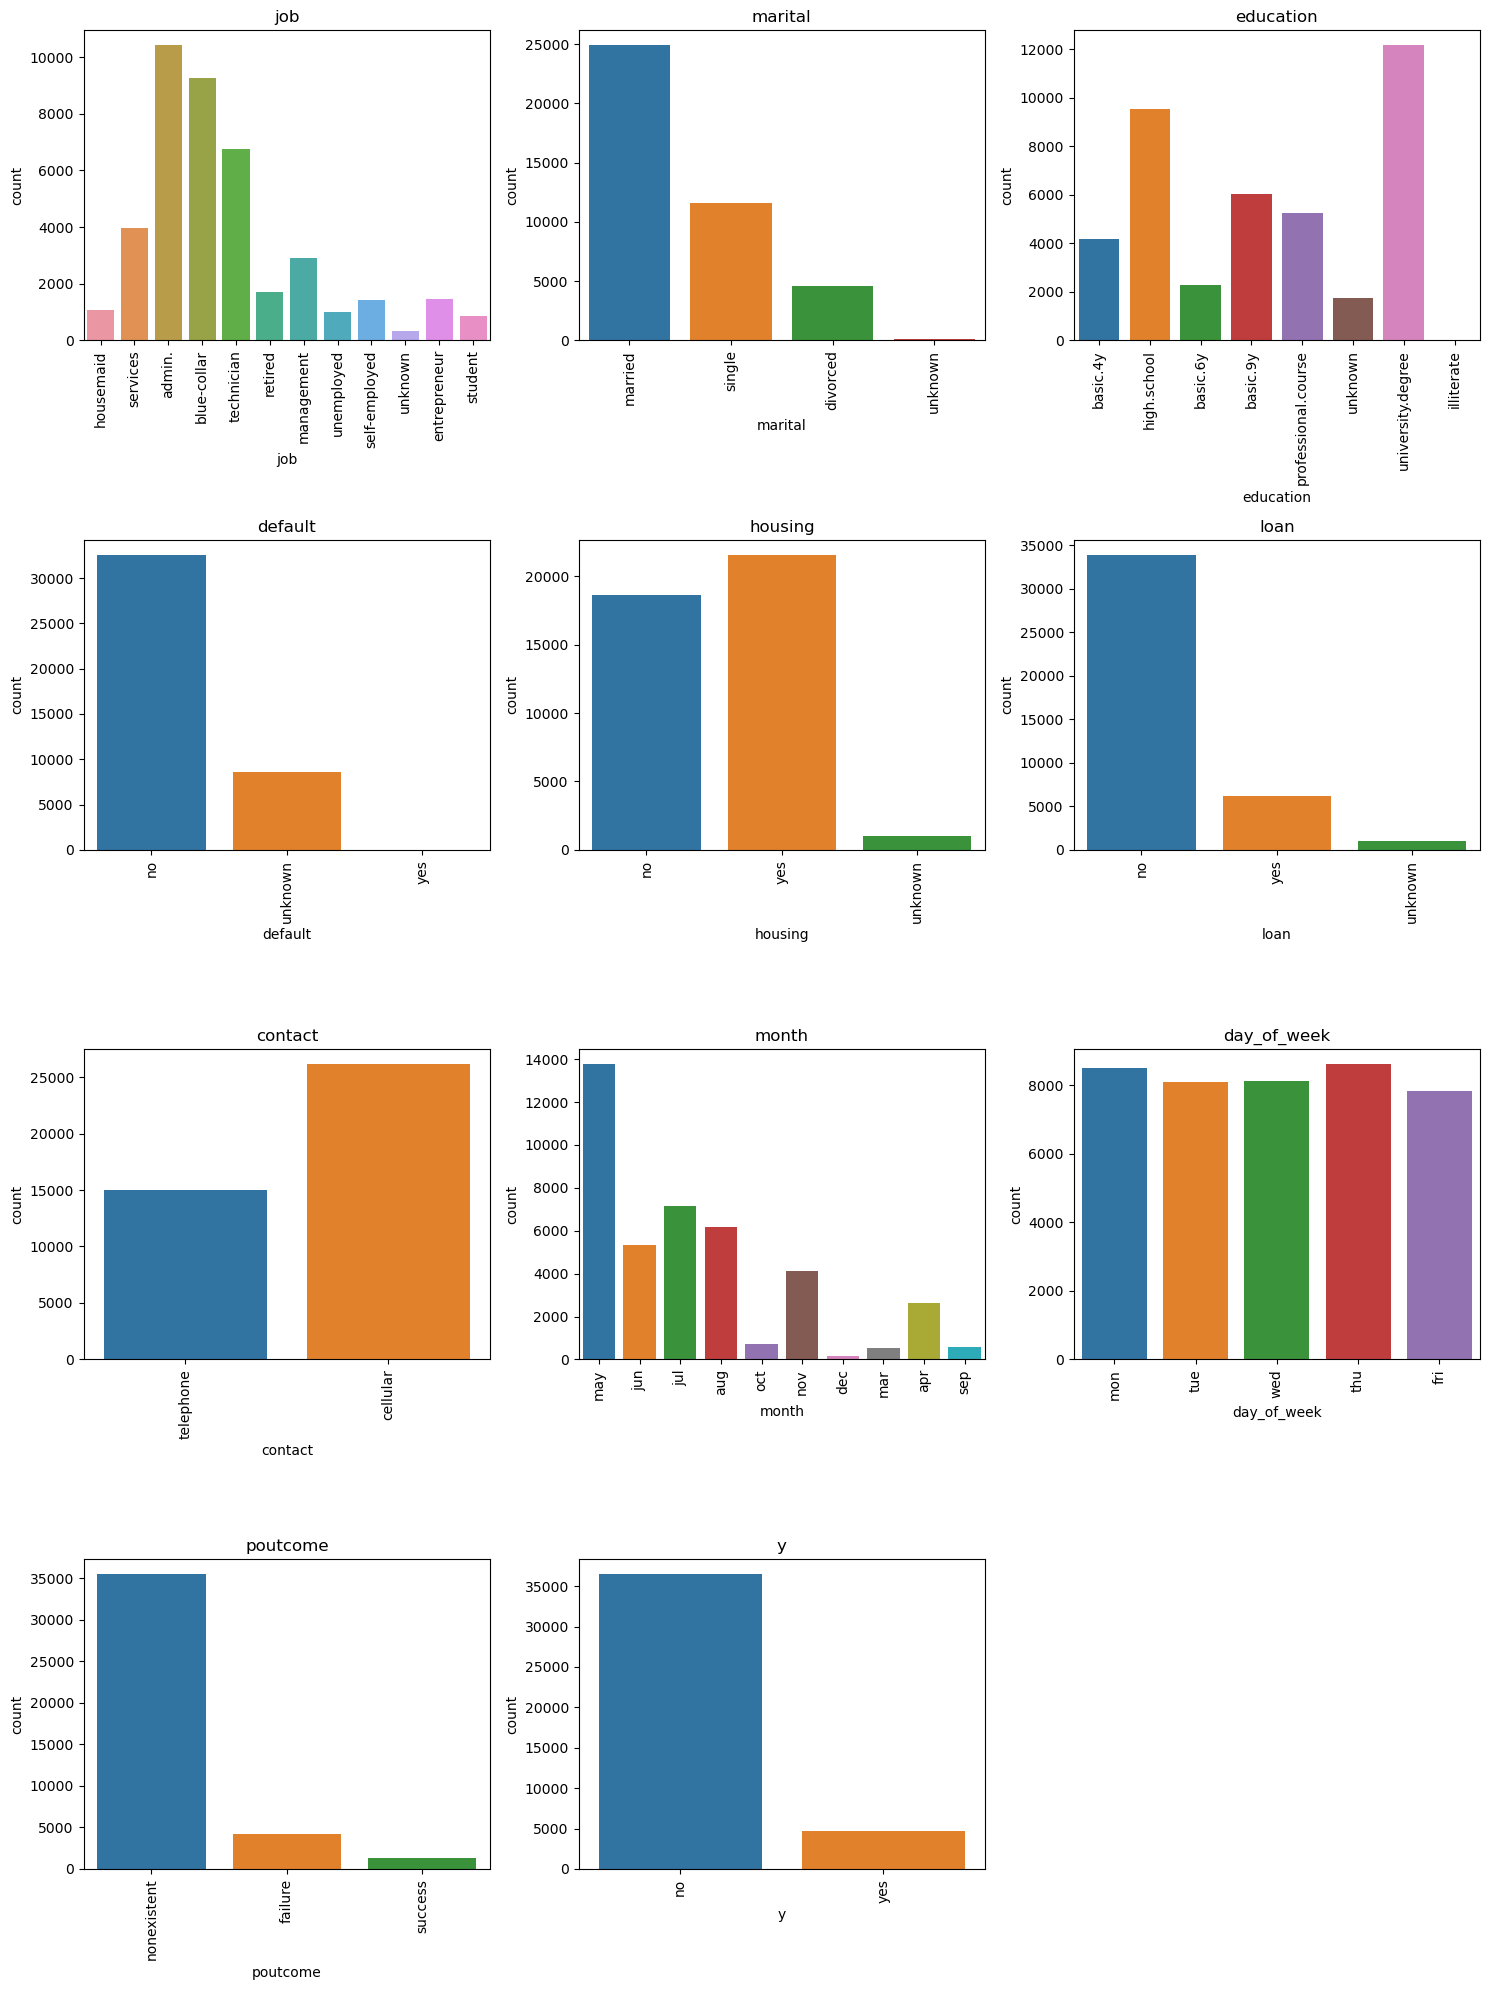

In [10]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# create a countplot with largest 12 values : 
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(12).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [11]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

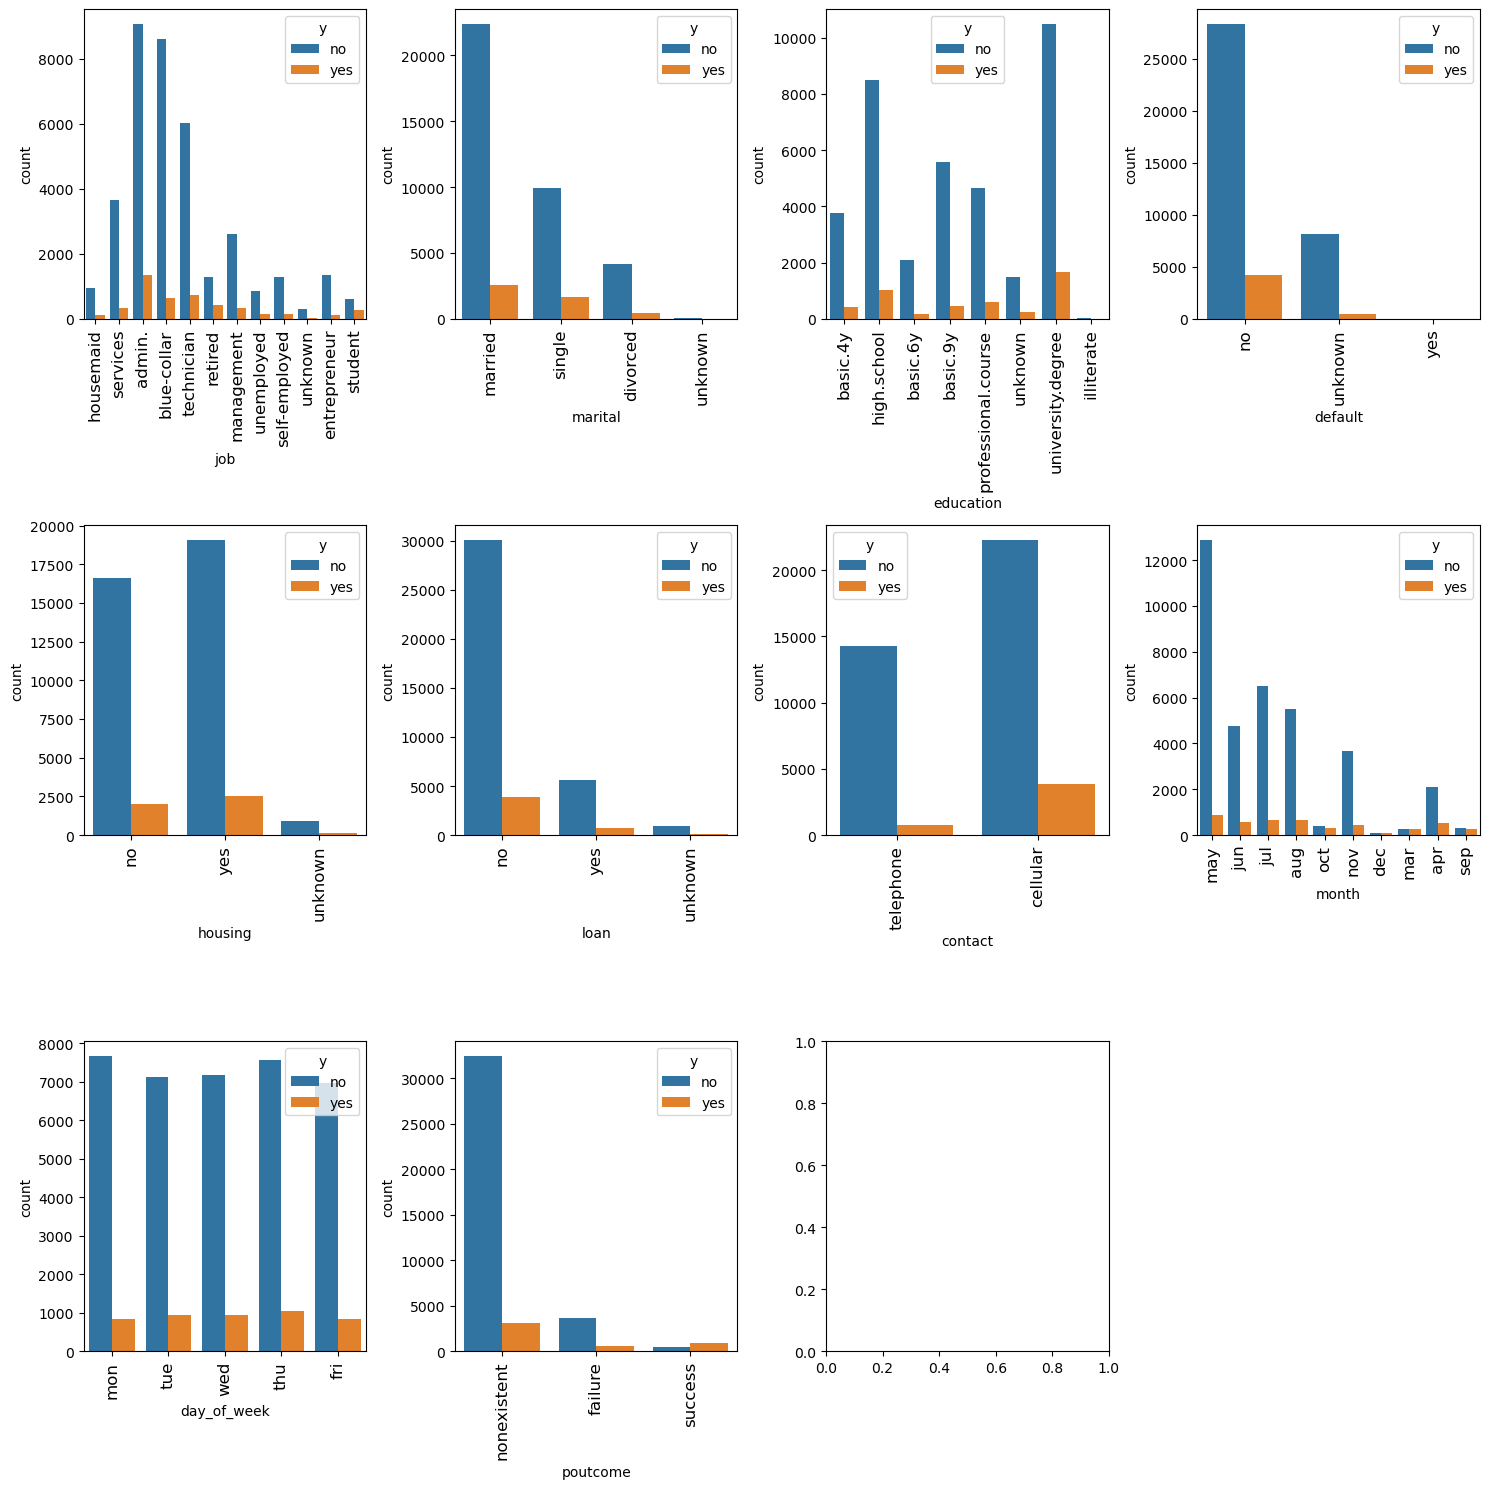

In [12]:
# list of categorical variables to plot
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='y', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90,size=12)

# Remove any extra empty subplots needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

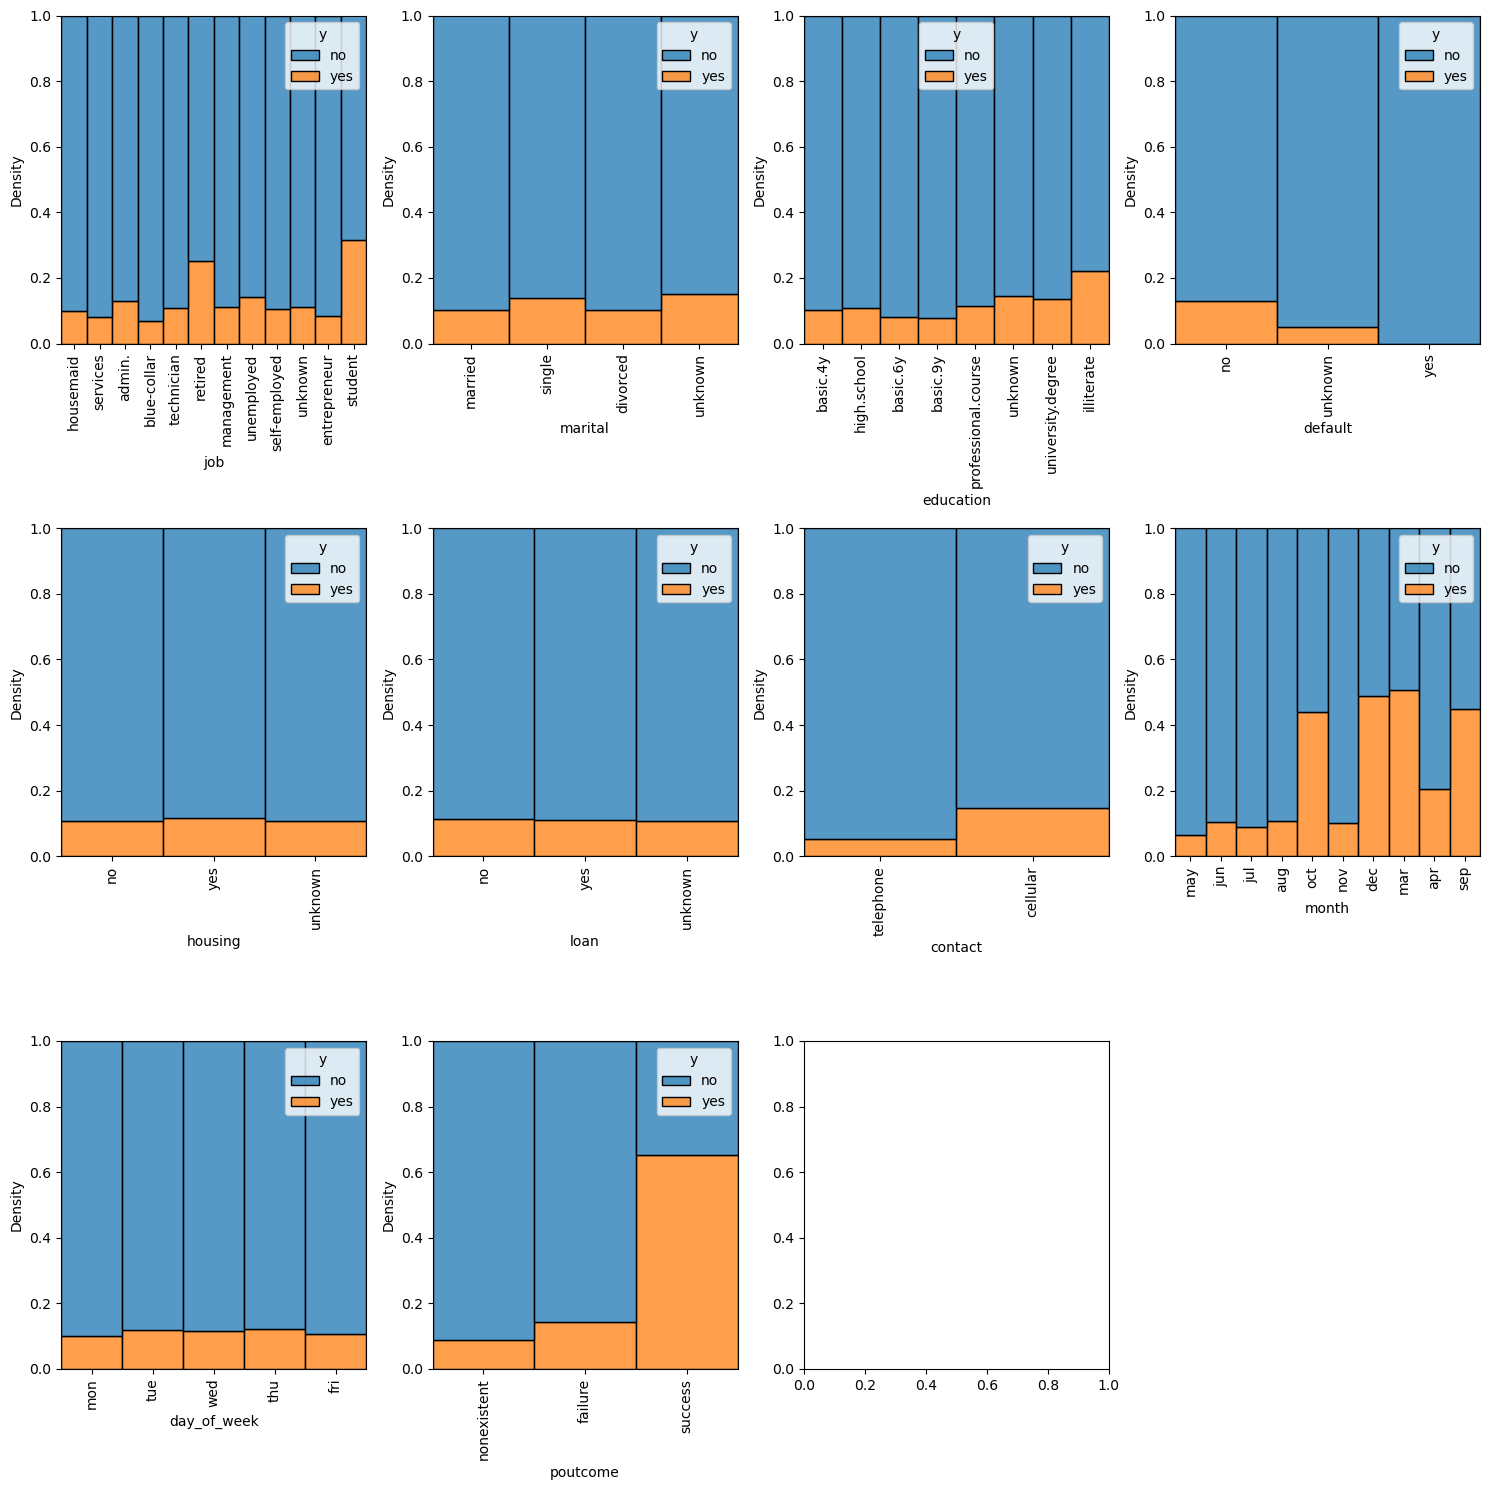

In [13]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='y', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# Remove any extra empty subplots needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
    
# adjust spacing between subplots
fig.tight_layout()


# show plot
plt.show()

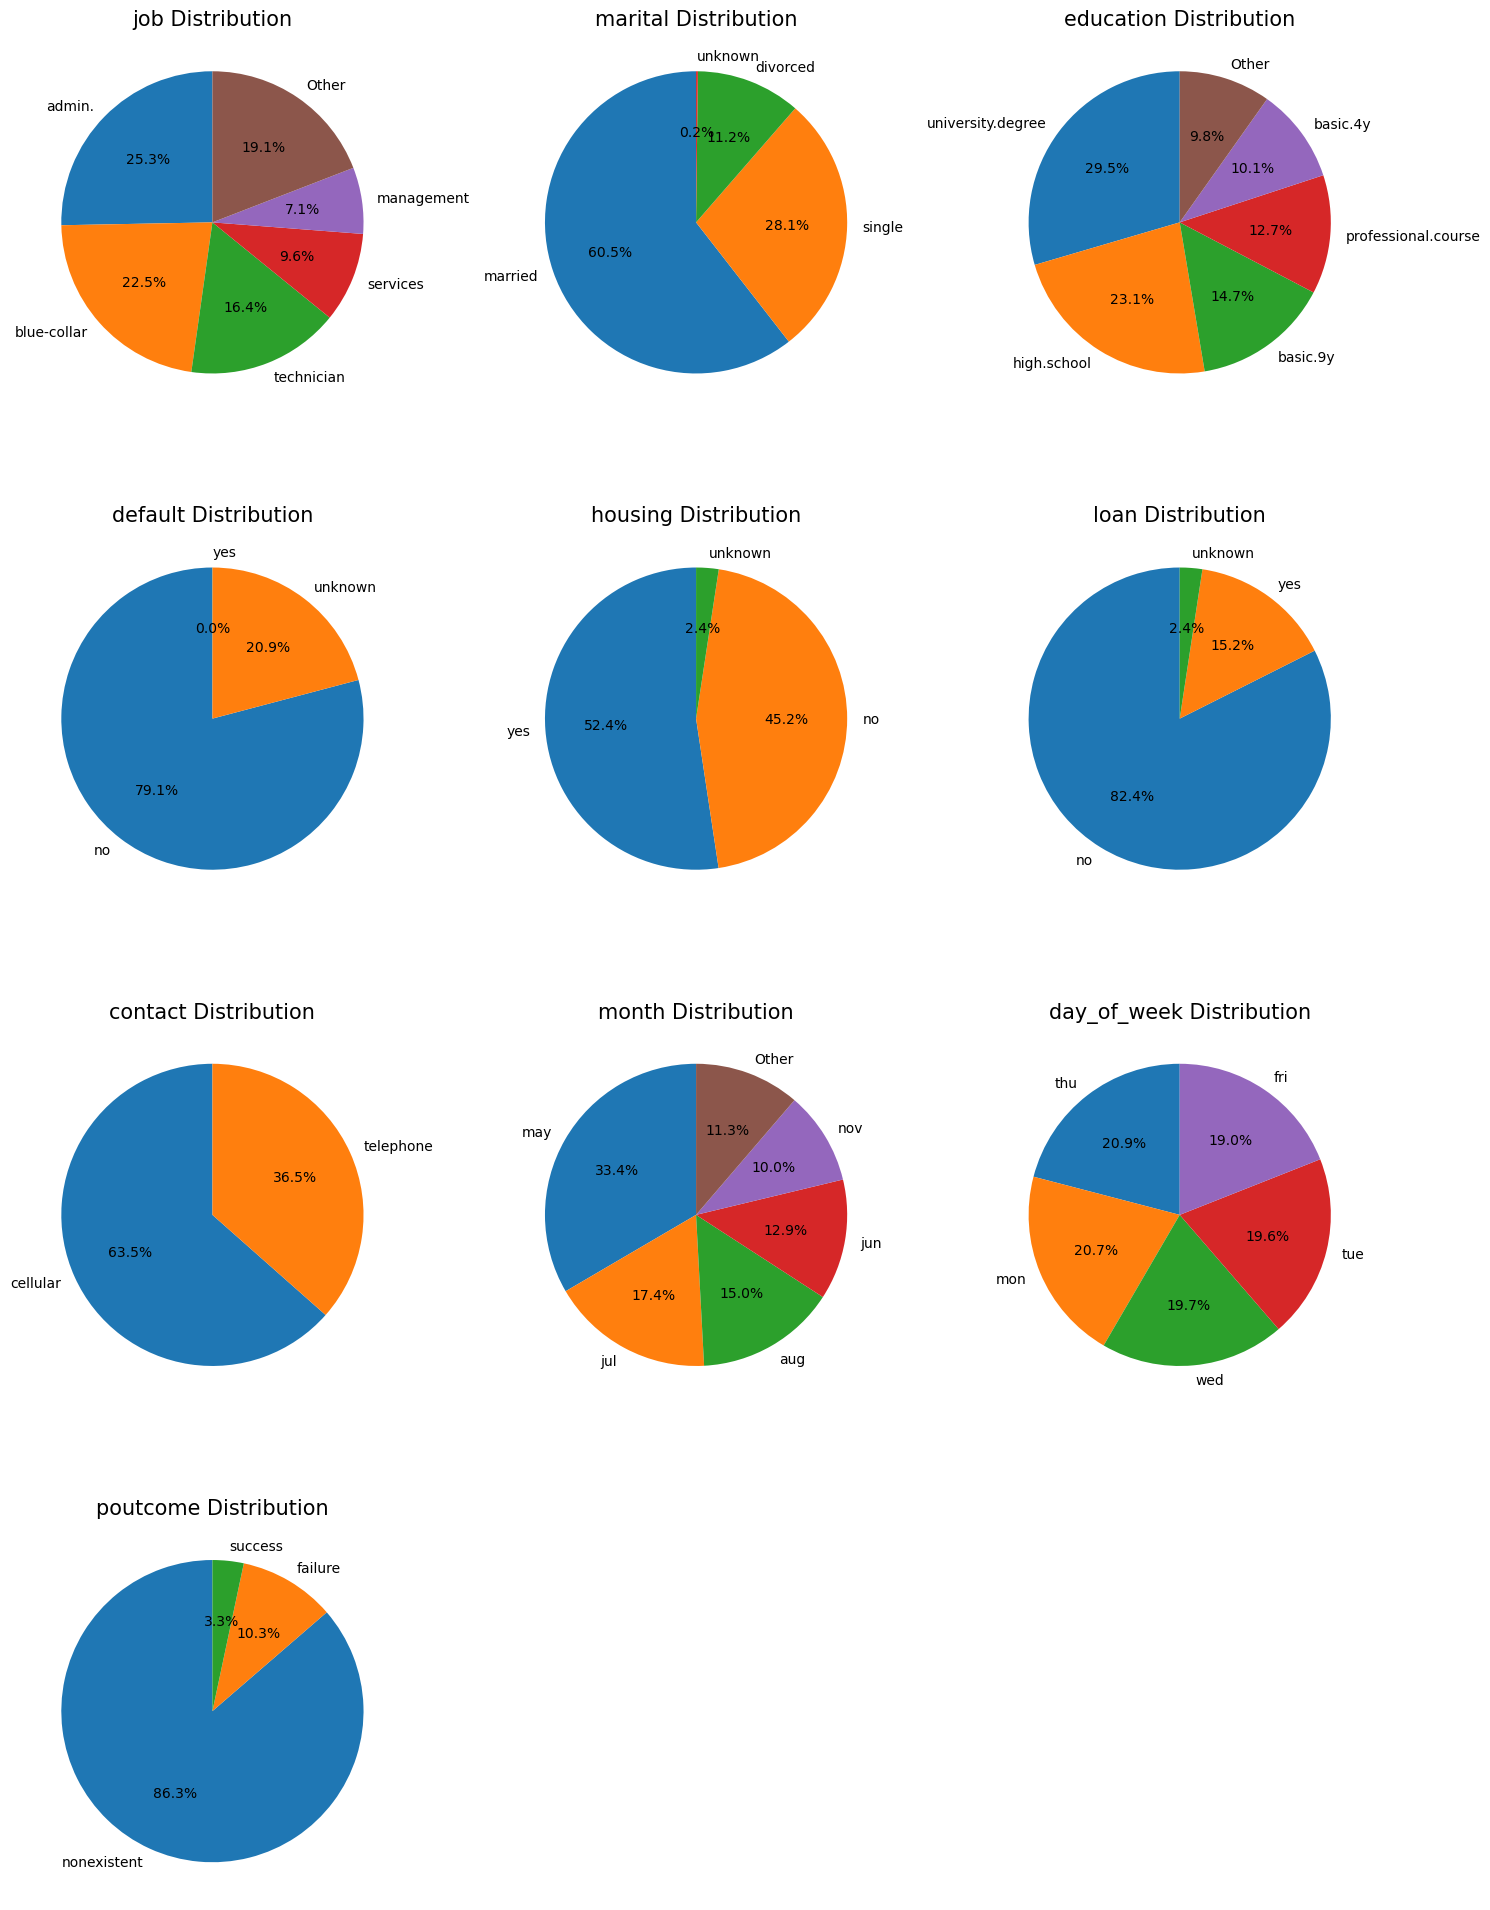

In [14]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' data type
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution',size=15)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> **Plots For numerical Variables**</p>

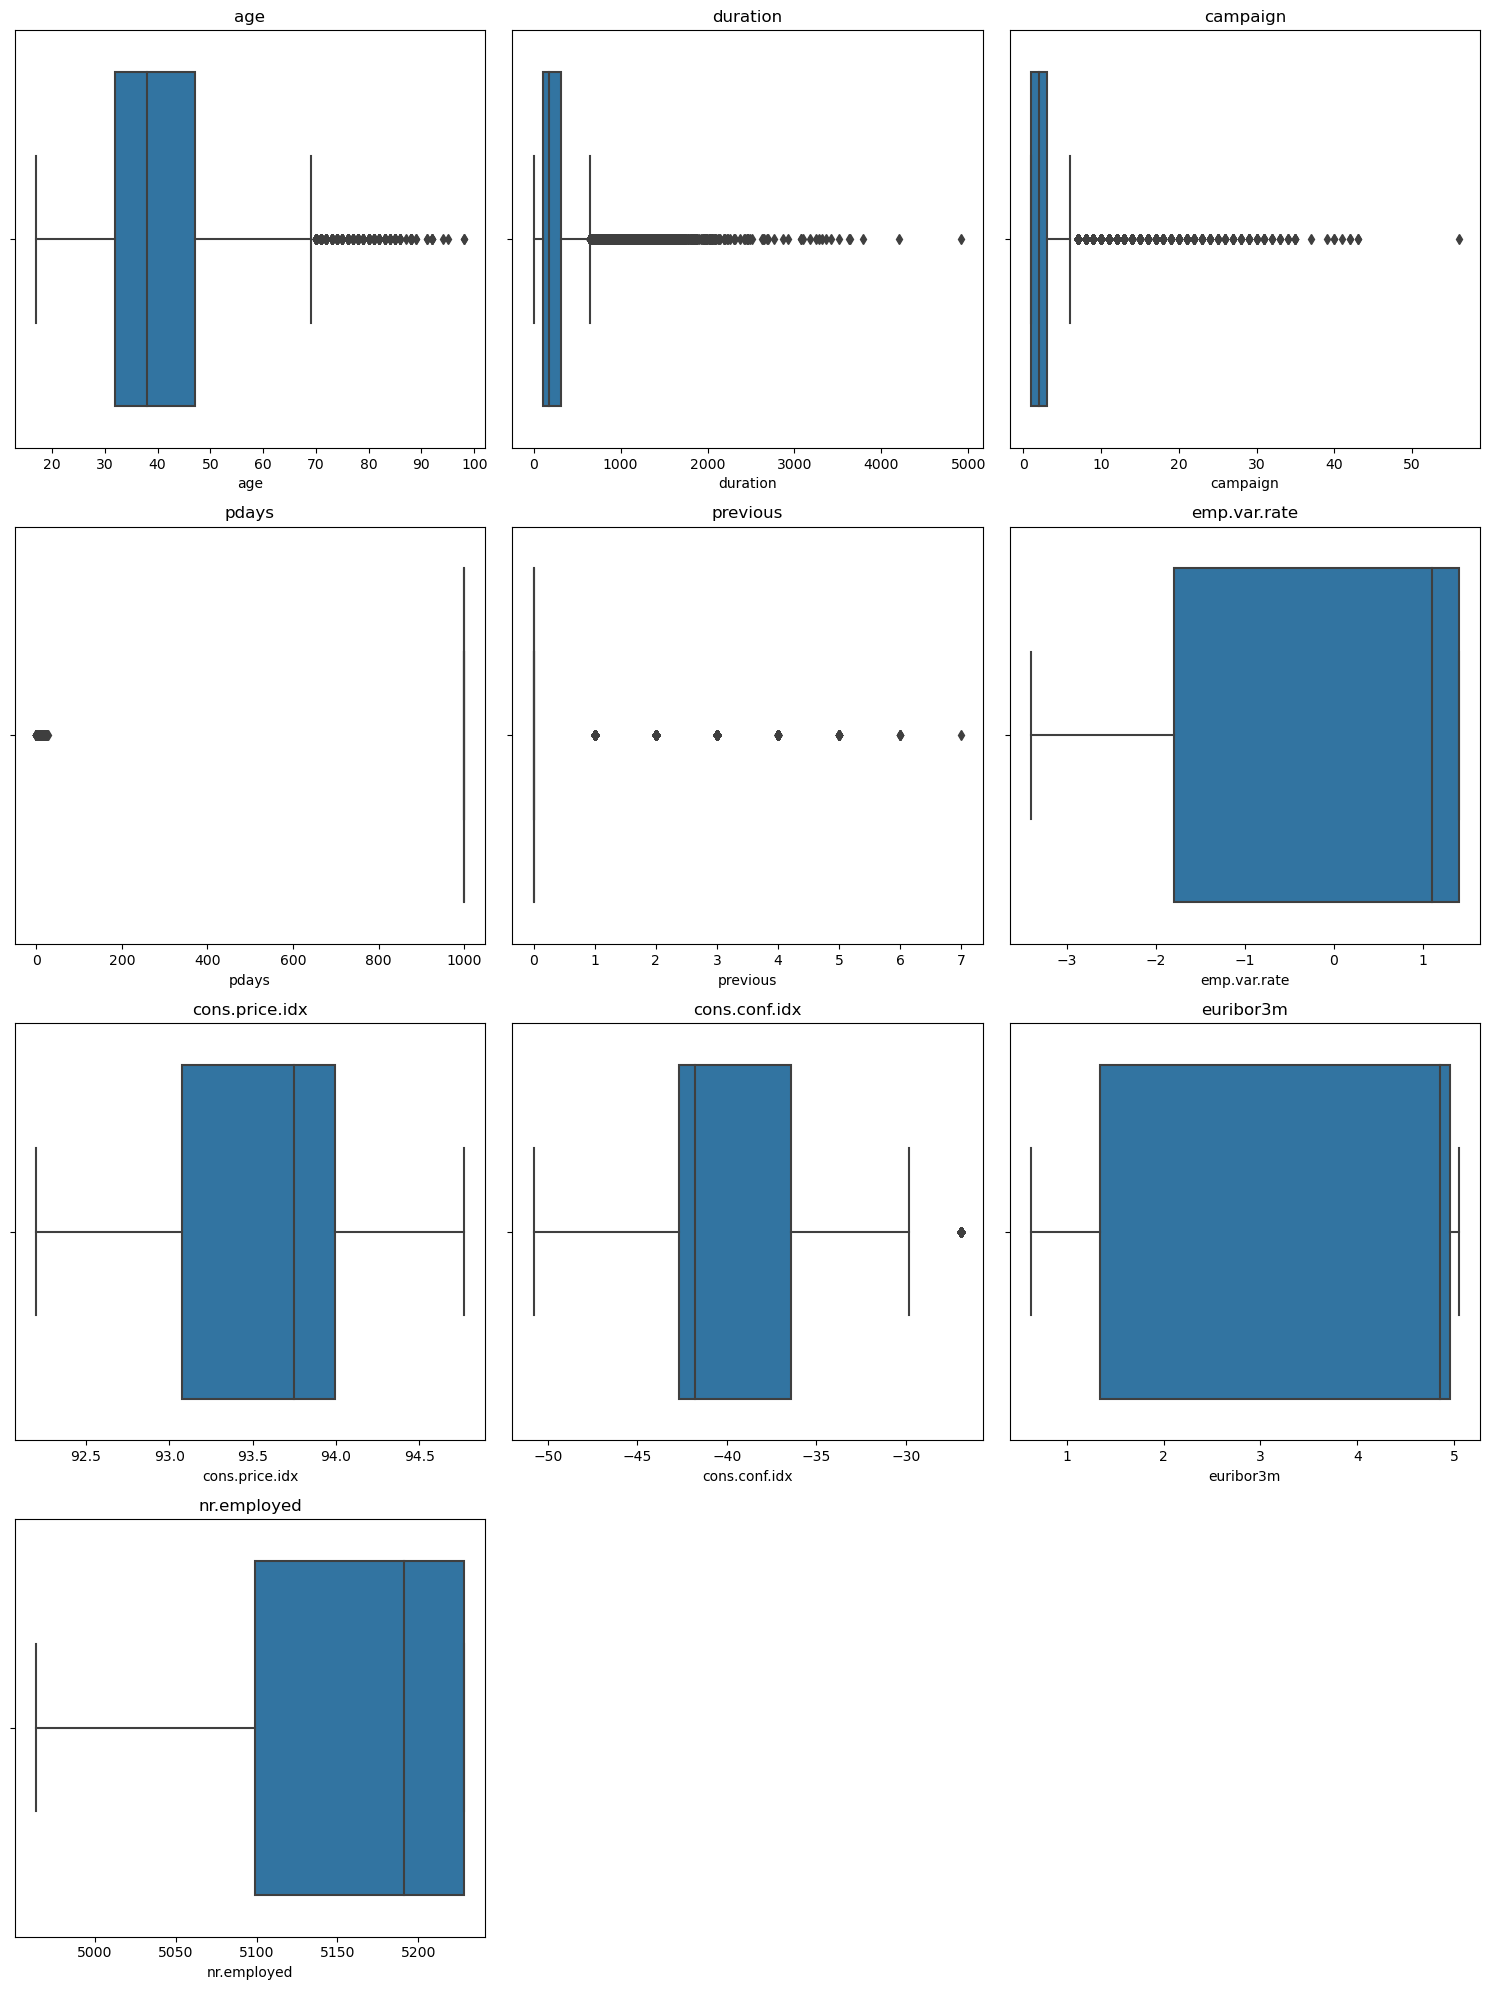

In [15]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

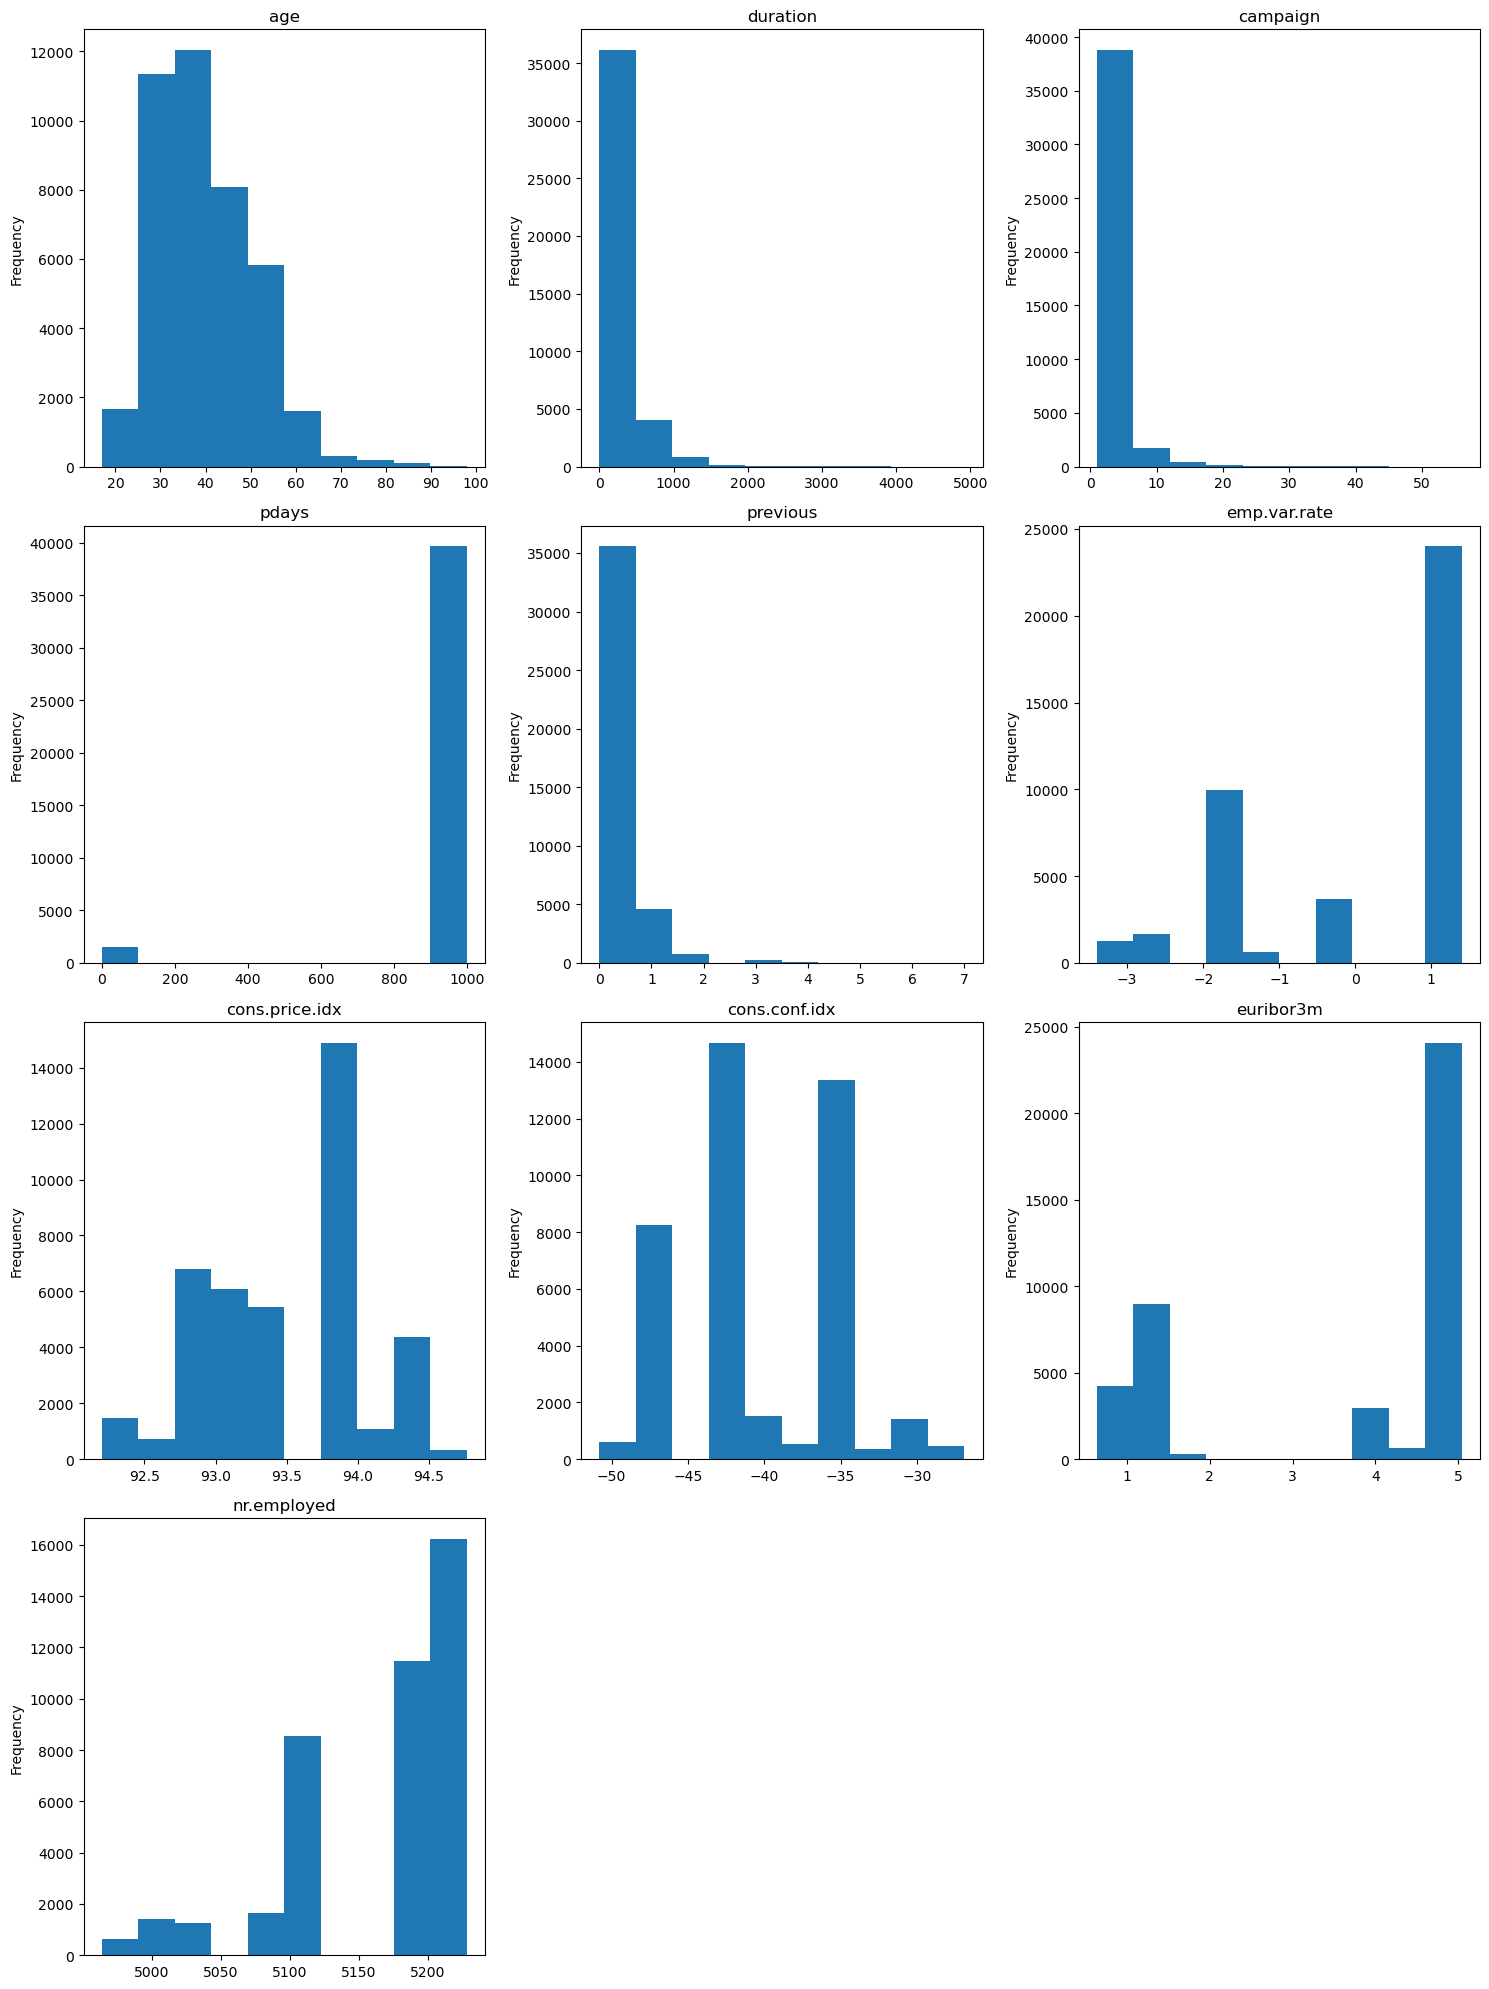

In [16]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

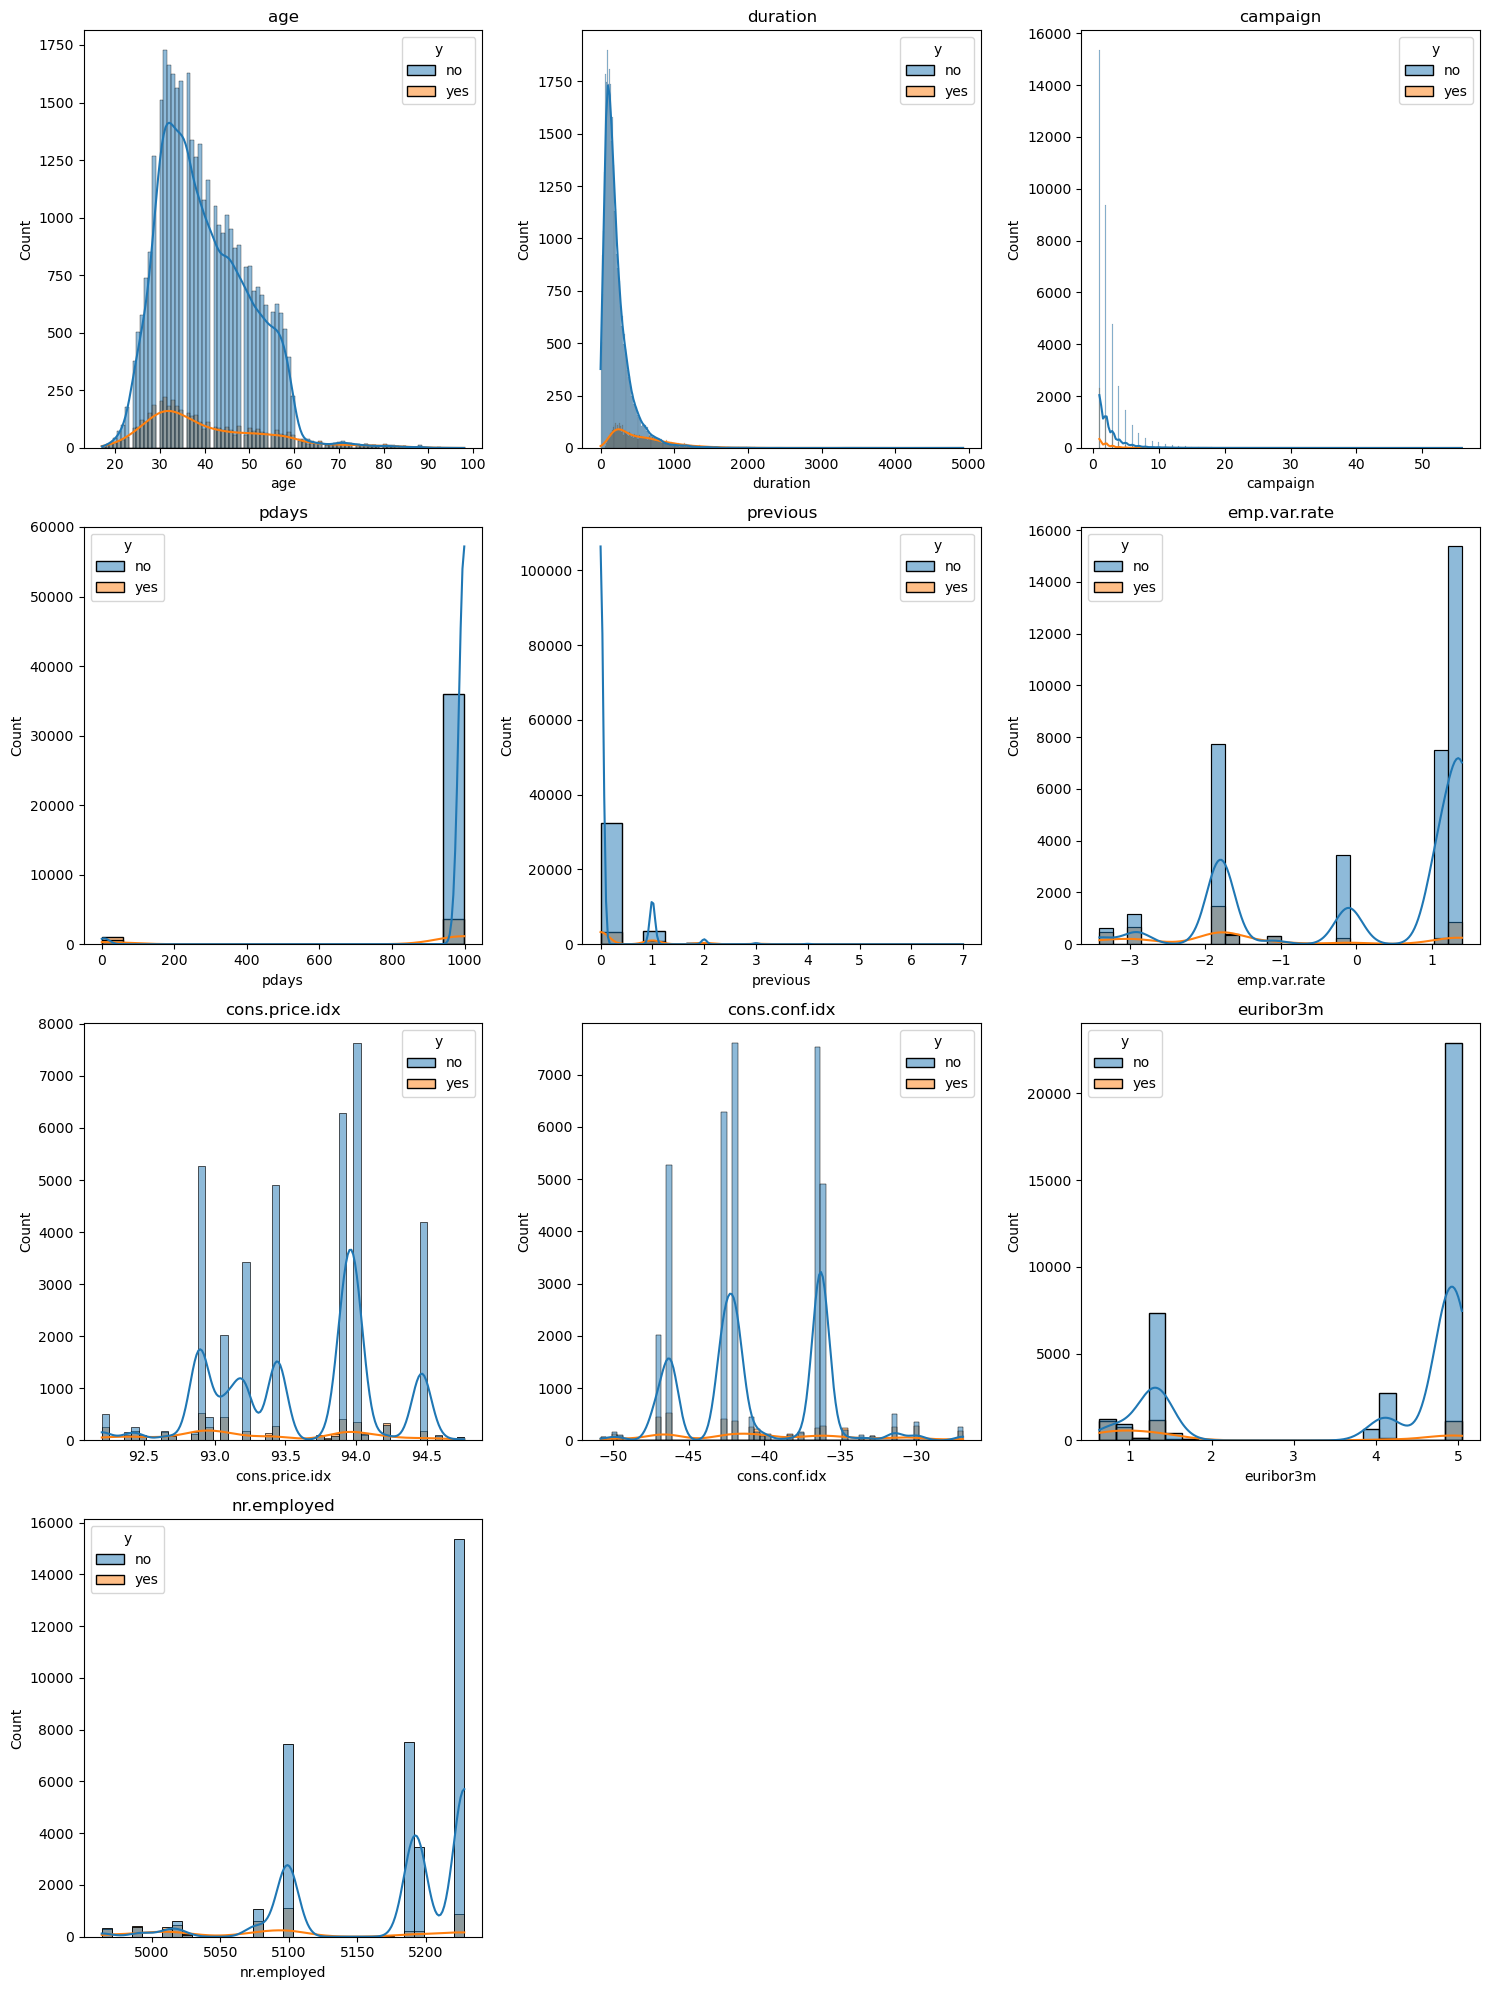

In [17]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='y', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking For Highly Correlated Columns</p>

In [18]:
corr =df.corr()
corr_greater_than_70 = corr[corr>=.75]
corr_greater_than_70

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


<Axes: >

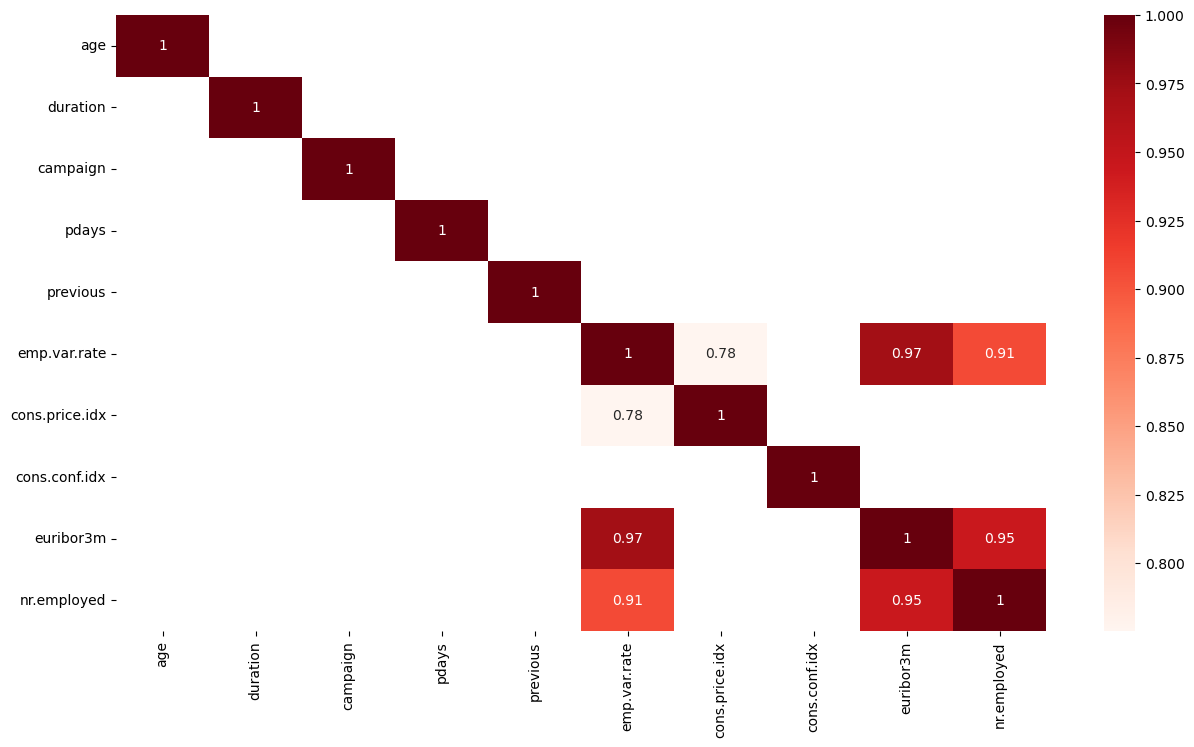

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap (corr_greater_than_70,annot=True,cmap='Reds')

> Some correlation can be seen here between emp. var rate and nr.employed.

> Also, euribor3m and emp.var rate.

> However,  I would not be removing any. As I am gonna mostly be training on tree models which doesn't require much preprocessing.

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Checking Unique Values For Days Column</p>

In [20]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

> **999 represents no contact has been done, thus i'll be assigning it a very less weight.**



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Dropping Columns Which I Feel Won't Affect The Predictions</p>

In [21]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">One Hot Encoding Remaining Categorical Features</p>

In [22]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [23]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

job: [ 3  7  0  1  9  5  4 10  6 11  2  8]
marital: [1 2 0 3]
education: [0 3 1 2 5 7 6 4]
default: [0 1 2]
housing: [0 2 1]
loan: [0 2 1]
poutcome: [1 0 2]
y: [0 1]




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Train-Test Split</p>

In [24]:
x = df.drop("y", axis=1)
y = df['y']
x.sample()

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)


In [25]:
print('x_train',x_train.head(4))
print ('x_train_ shape',x_train.shape)
print('*'*50)
print('y_train',y_train)
print('y_train_shape',y_train.shape)

x_train        age  job  marital  education  default  housing  loan  duration  \
549     50    1        1          0        1        1     1       153   
1974    26    1        2          3        0        0     0       213   
20992   34    9        1          3        0        2     0        85   
1730    30    1        2          2        0        2     0       322   

       campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
549           1    999         0         1           1.1          93.994   
1974          4    999         0         1           1.1          93.994   
20992         3    999         0         1           1.4          93.444   
1730          1    999         0         1           1.1          93.994   

       cons.conf.idx  euribor3m  nr.employed  
549            -36.4      4.857       5191.0  
1974           -36.4      4.855       5191.0  
20992          -36.1      4.964       5228.1  
1730           -36.4      4.855       5191.0  
x_train_ s



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With Decision Tree</p>



# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Tuning The Hyperparameters Of Decision Tree</p>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}




# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Decision Tree Based Bagging</p>

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=2,
                       random_state=0)

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> Evaluate Decision Tree model </p>

In [39]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 84.25 %


In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8424783917645916
Precision Score :  0.8424783917645916
Recall Score :  0.8424783917645916
Jaccard Score :  0.7278295158989848
Log Loss :  5.677654248533361


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;"> compute SHAP values </p>


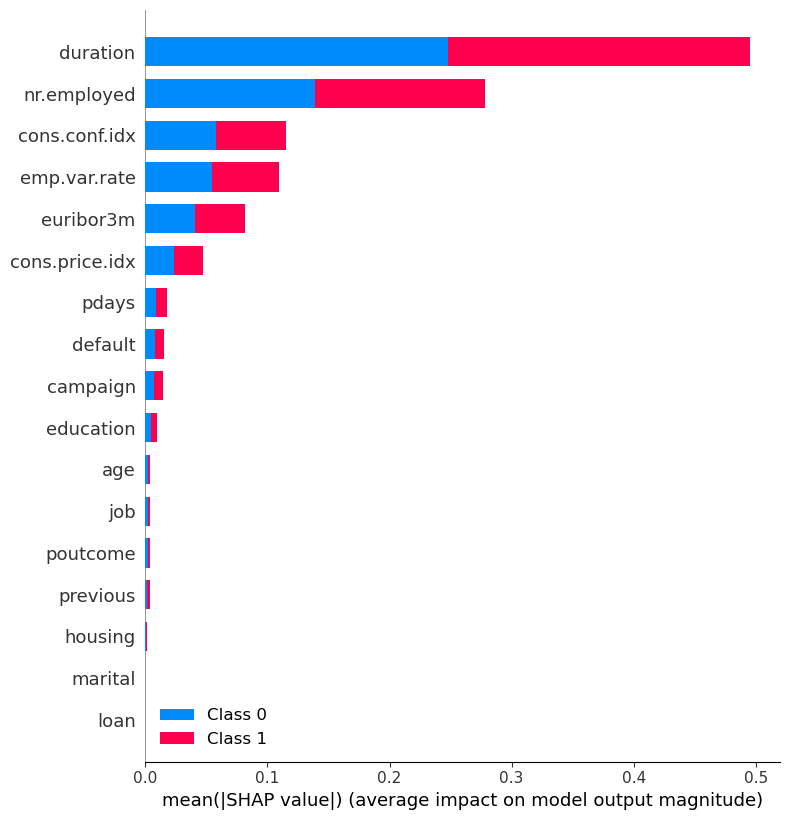

In [30]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

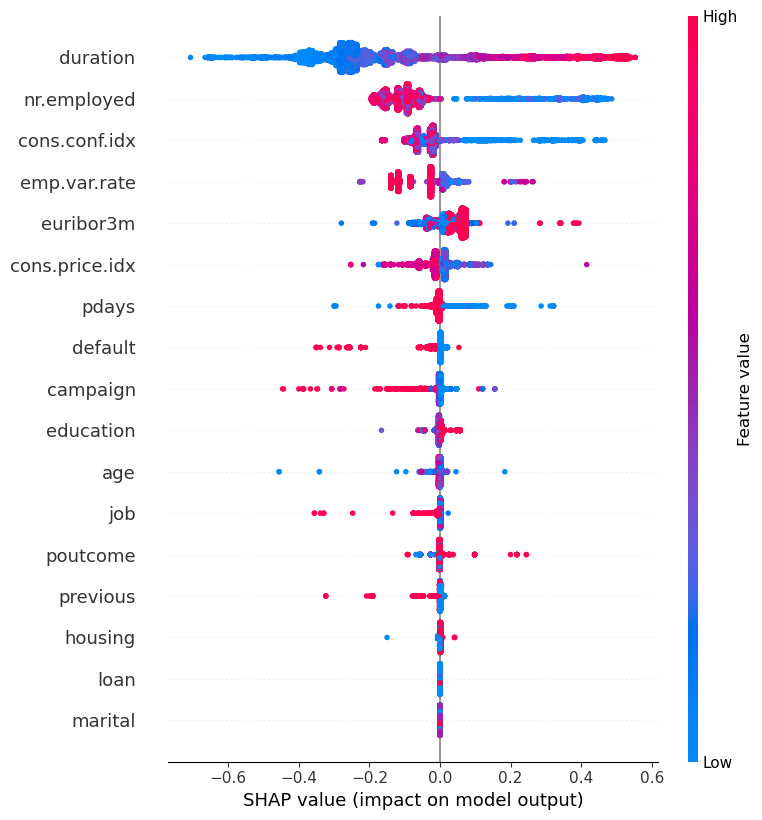

In [31]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test.values, feature_names = x_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8424783917645916')

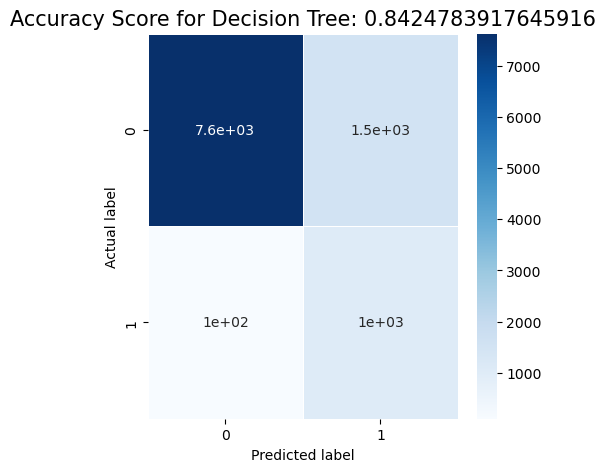

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

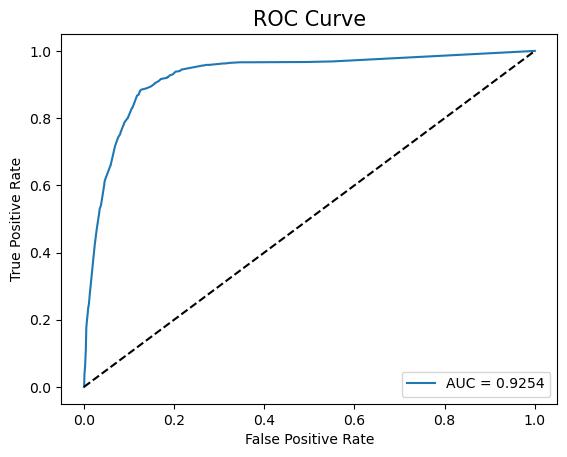

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

<a id ="8"></a>


# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Results & Conclusion</p>

> **Bagging with Decision tree is performing the best according to recall and roc.**

> **For a credit insurance problem, I would want to go with recall here.**